# Get ERCOT Ancillary Services Prices

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

In [2]:
iso = gridstatus.Ercot()

## Get Ancillary Services Prices

Note: the time specified is the delivery time of the ancillary service

In [3]:
df = iso.get_as_prices("today")
df.head(5)

Time Market  Non-Spinning Reserves  Regulation Down  \
0 2022-11-29 00:00:00-06:00    DAM                   0.75             4.00   
1 2022-11-29 01:00:00-06:00    DAM                   0.55             3.69   
2 2022-11-29 02:00:00-06:00    DAM                   0.48             2.41   
3 2022-11-29 03:00:00-06:00    DAM                   0.69             3.50   
4 2022-11-29 04:00:00-06:00    DAM                   0.50             4.00   

   Regulation Up  Responsive Reserves  
0           3.19                 2.39  
1           4.69                 2.69  
2           3.19                 2.39  
3           4.69                 2.69  
4           5.98                 2.69

## Get Historical AS Prices

ERCOT publishes the last 30 days of prices.

In [4]:
thirty_days_ago = pd.Timestamp.now().date() - pd.Timedelta(days=30)
df = iso.get_as_prices(start=thirty_days_ago, end="today")
df

100%|██████████| 31/31 [00:16<00:00,  1.90it/s]


Time Market  Non-Spinning Reserves  Regulation Down  \
0   2022-10-30 00:00:00-05:00    DAM                   2.85             2.34   
1   2022-10-30 01:00:00-05:00    DAM                   2.72             1.61   
2   2022-10-30 02:00:00-05:00    DAM                   2.01             0.68   
3   2022-10-30 03:00:00-05:00    DAM                   2.00             1.41   
4   2022-10-30 04:00:00-05:00    DAM                   2.00             1.69   
..                        ...    ...                    ...              ...   
740 2022-11-29 19:00:00-06:00    DAM                   1.74             2.69   
741 2022-11-29 20:00:00-06:00    DAM                   1.09             2.49   
742 2022-11-29 21:00:00-06:00    DAM                   1.04             3.49   
743 2022-11-29 22:00:00-06:00    DAM                   1.00             4.00   
744 2022-11-29 23:00:00-06:00    DAM                   1.04             5.00   

     Regulation Up  Responsive Reserves  
0             3.89                 1.89  
1             3.59                 1.59  
2             2.81                 1.39  
3             3.39                 1.39  
4             3.67                 1.49  
..             ...                  ...  
740           2.31                 2.00  
741           2.31                 2.00  
742           3.49                 2.39  
743           5.98                 3.00  
744           5.00                 3.00  

[745 rows x 6 columns]

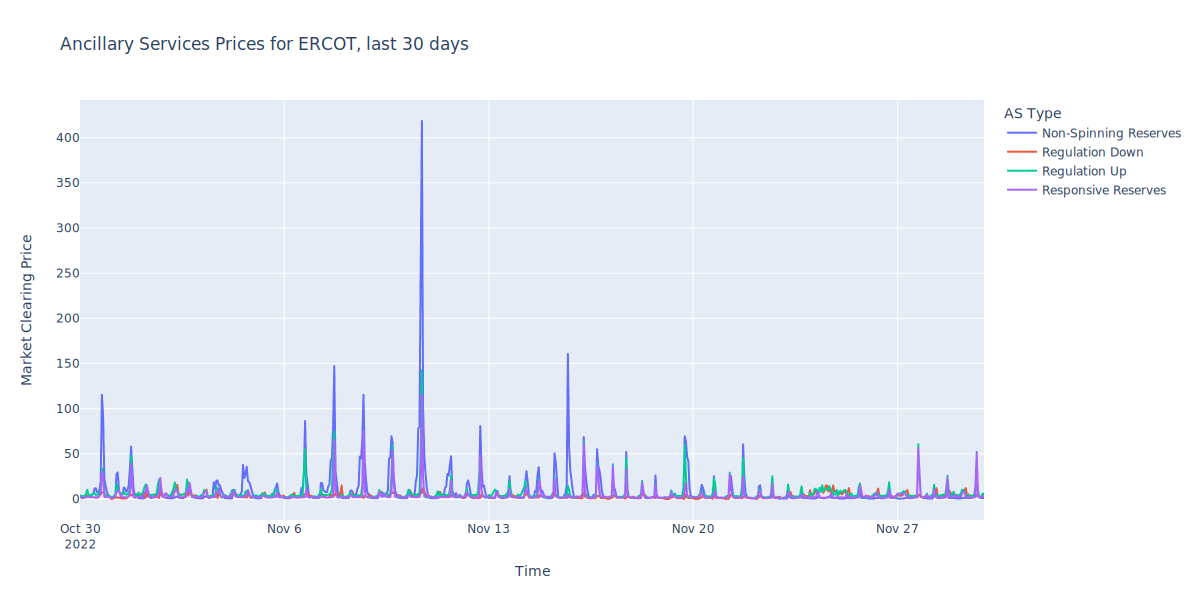

In [5]:
data = df.set_index("Time").drop(columns=["Market"])
data.columns.name = "AS Type"
fig = px.line(
    data,
    x=data.index,
    y=data.columns,
    title="Ancillary Services Prices for ERCOT, last 30 days",
)
fig.update_yaxes(title="Market Clearing Price")
fig.show("svg", width=1200, height=600)